In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

LECTURA DE DATOS

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ISIC_Dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [5]:
tile_df = pd.read_csv('HAM10000_metadata.csv')
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
tile_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
2105,HAM_0005078,ISIC_0030784,mel,histo,85.0,male,upper extremity,HAM10000_images_part_2/ISIC_0030784.jpg,dermatofibroma,6
839,HAM_0001781,ISIC_0029823,bkl,consensus,30.0,female,back,HAM10000_images_part_2/ISIC_0029823.jpg,Benign keratosis-like lesions,2
3421,HAM_0000649,ISIC_0027276,nv,follow_up,40.0,female,abdomen,HAM10000_images_part_1/ISIC_0027276.jpg,Melanocytic nevi,4


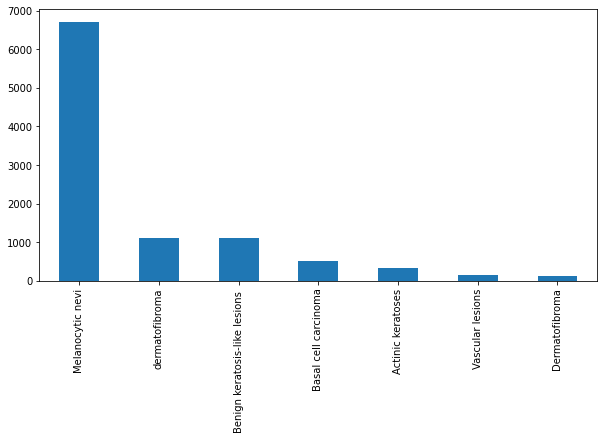

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

In [10]:
tile_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [11]:
tile_df['age'].fillna((tile_df['age'].mean()), inplace=True)

In [14]:
tile_df['image'] = tile_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [22]:
tile_df.to_csv('ISIC_dataset.csv', index=False)

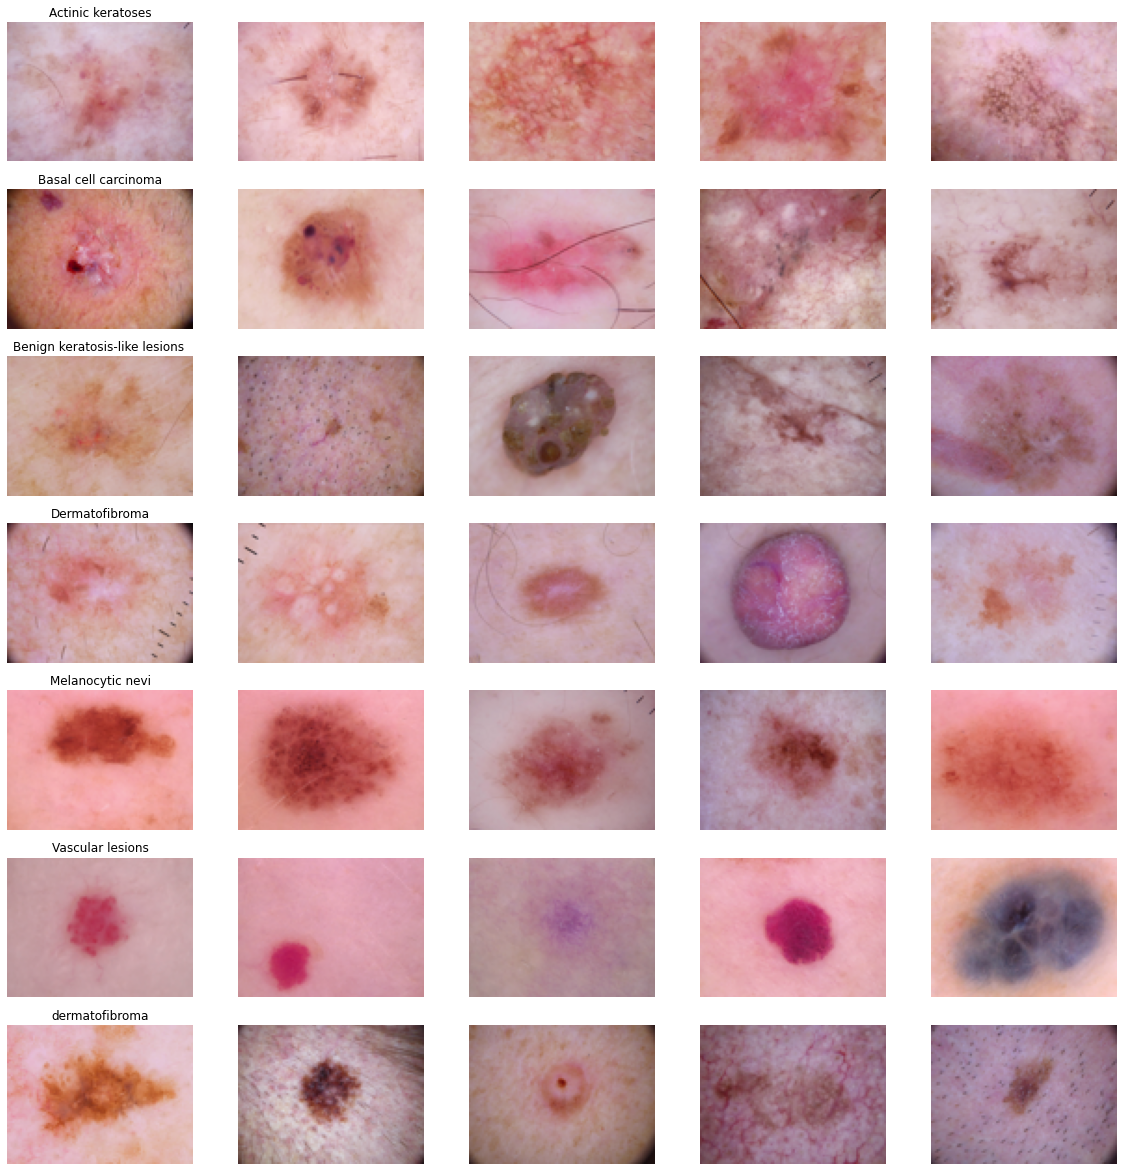

In [16]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

CREACIÓN DEL DATASET

In [17]:
tile_df[['cell_type_idx', 'cell_type']].sort_values('cell_type_idx').drop_duplicates()

,cell_type_idx,cell_type
9804,0,Actinic keratoses
2528,1,Basal cell carcinoma
1018,2,Benign keratosis-like lesions
1159,3,Dermatofibroma
7050,4,Melanocytic nevi
2370,5,Vascular lesions
1577,6,dermatofibroma


In [23]:

df = pd.read_csv('ISIC_dataset.csv')

In [24]:
df.tail(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
10005,HAM_0005579,ISIC_0028393,akiec,histo,80.0,male,face,HAM10000_images_part_1/ISIC_0028393.jpg,Actinic keratoses,0,[[[130 91 78]\n [135 96 83]\n [141 102 ...
10006,HAM_0004034,ISIC_0024948,akiec,histo,55.0,female,face,HAM10000_images_part_1/ISIC_0024948.jpg,Actinic keratoses,0,[[[202 150 151]\n [203 152 150]\n [202 155 1...
10007,HAM_0001565,ISIC_0028619,akiec,histo,60.0,female,face,HAM10000_images_part_1/ISIC_0028619.jpg,Actinic keratoses,0,[[[32 15 20]\n [28 14 18]\n [25 12 17]\n .....
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face,HAM10000_images_part_2/ISIC_0033705.jpg,Actinic keratoses,0,[[[194 157 178]\n [189 146 162]\n [168 121 1...
10009,HAM_0005705,ISIC_0031430,akiec,histo,75.0,female,lower extremity,HAM10000_images_part_2/ISIC_0031430.jpg,Actinic keratoses,0,[[[164 157 158]\n [166 158 158]\n [165 156 1...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,HAM10000_images_part_2/ISIC_0033084.jpg,Actinic keratoses,0,[[[155 137 148]\n [154 136 147]\n [151 134 1...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,HAM10000_images_part_2/ISIC_0033550.jpg,Actinic keratoses,0,[[[ 5 6 4]\n [ 6 7 4]\n [ 7 8 6]\n .....
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,HAM10000_images_part_2/ISIC_0033536.jpg,Actinic keratoses,0,[[[112 102 105]\n [127 116 117]\n [141 127 1...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,HAM10000_images_part_2/ISIC_0032854.jpg,Actinic keratoses,0,[[[159 122 146]\n [159 123 141]\n [154 112 1...
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back,HAM10000_images_part_2/ISIC_0032258.jpg,dermatofibroma,6,[[[177 147 133]\n [176 143 132]\n [177 143 1...


In [21]:
df_noidx.tail(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
10005,HAM_0005579,ISIC_0028393,akiec,histo,80.0,male,face,HAM10000_images_part_1/ISIC_0028393.jpg,Actinic keratoses,0,[[[130 91 78]\n [135 96 83]\n [141 102 ...
10006,HAM_0004034,ISIC_0024948,akiec,histo,55.0,female,face,HAM10000_images_part_1/ISIC_0024948.jpg,Actinic keratoses,0,[[[202 150 151]\n [203 152 150]\n [202 155 1...
10007,HAM_0001565,ISIC_0028619,akiec,histo,60.0,female,face,HAM10000_images_part_1/ISIC_0028619.jpg,Actinic keratoses,0,[[[32 15 20]\n [28 14 18]\n [25 12 17]\n .....
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face,HAM10000_images_part_2/ISIC_0033705.jpg,Actinic keratoses,0,[[[194 157 178]\n [189 146 162]\n [168 121 1...
10009,HAM_0005705,ISIC_0031430,akiec,histo,75.0,female,lower extremity,HAM10000_images_part_2/ISIC_0031430.jpg,Actinic keratoses,0,[[[164 157 158]\n [166 158 158]\n [165 156 1...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,HAM10000_images_part_2/ISIC_0033084.jpg,Actinic keratoses,0,[[[155 137 148]\n [154 136 147]\n [151 134 1...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,HAM10000_images_part_2/ISIC_0033550.jpg,Actinic keratoses,0,[[[ 5 6 4]\n [ 6 7 4]\n [ 7 8 6]\n .....
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,HAM10000_images_part_2/ISIC_0033536.jpg,Actinic keratoses,0,[[[112 102 105]\n [127 116 117]\n [141 127 1...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,HAM10000_images_part_2/ISIC_0032854.jpg,Actinic keratoses,0,[[[159 122 146]\n [159 123 141]\n [154 112 1...
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back,HAM10000_images_part_2/ISIC_0032258.jpg,dermatofibroma,6,[[[177 147 133]\n [176 143 132]\n [177 143 1...
